# Fraud detection machine learning model


### The goal of this project was to build a **fraud detection model** that accurately identifies fraudulent financial transactions. The dataset contains various transaction details, such as balances, transaction types, and amounts. The target variable, `isFraud`, determines whether a transaction is fraudulent or not. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Fraud.csv')

In [3]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
data['nameDest'].shape

(6362620,)

## From the column description, The balance of recipient, those with IDs starting with "M" before the transaction  are missing. This means they are not the focus of fraud detection

## For this reason, I will remove the rows of **oldbalanceDest** column with IDs starting with 'M'

In [6]:
data['nameDest'] = data['nameDest'].astype('str')

In [7]:
# Remove rows where 'oldbalanceDest' starts with 'M'
data = data[~data['nameDest'].str.startswith('M')]

In [8]:
data['nameDest'].shape

(4211125,)

In [9]:
data['type'].value_counts()

type
CASH_OUT    2237500
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

- ### We see that all transactions to IDs of 'M' receipent were all PAYMENT, therefore, it cannot be tagged as fraud.

# Dealing with missing values

- ### There are missing values in 'newbalanceDest'(recipent balance after transaction) because, unlike in the 'oldbalanceDest' (old balance of reciepent before transaction), the initial balance of a reciepent can be 0.0 
- ### The only way that recipent balance after transaction can be 0.0 could be when the transaction type is 'CASH_IN'
- ### I will carry out further Analysis particularly on 'CASH_IN' transaction type

In [10]:
#Dealing with missing values in 'newbalanceDest'
zero_counts = data[(data['newbalanceDest'] == 0)]

In [11]:
zero_counts

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.0,0.0,0,0
22,1,DEBIT,1065.41,C1959239586,1817.00,751.59,C515132998,10330.0,0.0,0,0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.00,C2001112025,25742.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.00,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.0,0.0,1,0


In [12]:
cash_in = zero_counts[zero_counts['type'].apply(lambda x: 'CASH_IN' in x)]
cash_in

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
391,1,CASH_IN,35902.49,C839771540,371688.15,407590.65,C2001112025,49003.30,0.0,0,0
401,1,CASH_IN,311023.52,C1078262677,2306779.82,2617803.34,C766572210,1477776.96,0.0,0,0
402,1,CASH_IN,151862.38,C178604517,2617803.34,2769665.72,C920011586,158858.48,0.0,0,0
405,1,CASH_IN,182861.45,C998242313,3218806.87,3401668.32,C485041780,192776.92,0.0,0,0
413,1,CASH_IN,6287.28,C1765702,4817829.42,4824116.71,C1651855867,11274.00,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362141,718,CASH_IN,65391.22,C1093908102,99732.00,165123.22,C84159872,0.00,0.0,0,0
6362152,718,CASH_IN,25226.75,C1548185608,49702.00,74928.75,C1828941458,0.00,0.0,0,0
6362154,718,CASH_IN,170102.32,C318675818,3242.00,173344.32,C169170159,0.00,0.0,0,0
6362243,718,CASH_IN,236545.64,C1232273357,42582.00,279127.64,C146554741,8281.12,0.0,0,0


- ### CASH_IN type of transaction is the only type of transaction in the dataset where the 'newbalanceDest' (that is the new balance after transaction will be less than the old balance before transaction)
- ### For that reason, it could be equal to zero(0.0) but from the segment of the dataset, we see that amount gotten from the customer is always less than the old balance before the transaction from the recipient, meaning that the new balance should have a value.
- ### The fact that it is 0.00 means it is a missing value

In [13]:
# Dropping rows with missing values in 'newbalanceDest' (value of 0.0)
data = data.drop(zero_counts.index)

In [14]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0
21,1,DEBIT,9302.79,C1566511282,11299.00,1996.21,C1973538135,29832.00,16896.70,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.00,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0


# Exploratory Data Analysis

In [15]:
data['type'].value_counts()

type
CASH_OUT    2226075
CASH_IN     1128413
TRANSFER     527735
DEBIT         40964
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

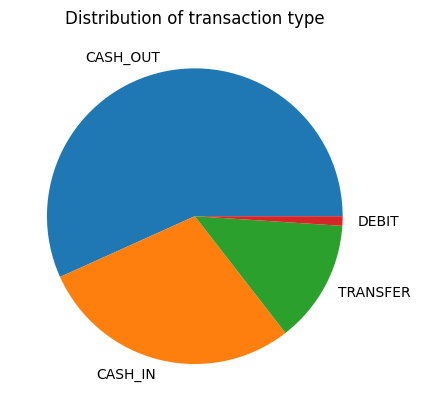

In [16]:
labelling= ['CASH_OUT', 'CASH_IN', 'TRANSFER', 'DEBIT']
plt.pie(data['type'].value_counts(), labels=labelling)
plt.title('Distribution of transaction type')
plt.show

In [17]:
data['nameDest'] = data['nameDest'].astype('str')

C:\Users\oshev\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


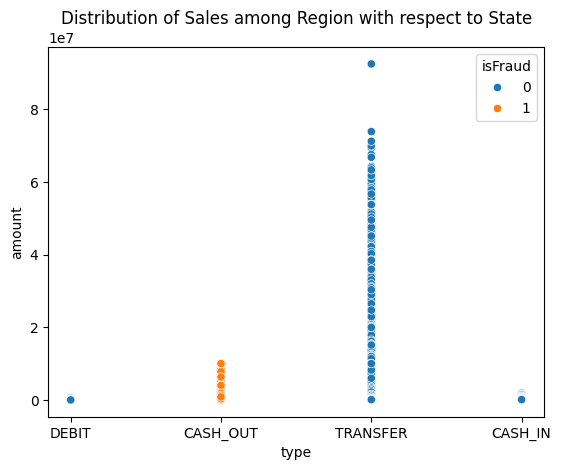

In [18]:
sns.scatterplot(y='amount', x= 'type',hue='isFraud', data= data)
plt.title('Distribution of Sales among Region with respect to State')
plt.show()

In [19]:
## There is prescence of an outlier in the dataset
data['amount'].sort_values(ascending=False).head(5)

3686583    92445516.64
4060598    73823490.36
4146397    71172480.42
3946920    69886731.30
3911956    69337316.27
Name: amount, dtype: float64

In [141]:
# Removing the one obvious outlier
outlier_value = 92445516.64
# Remove the outlier
data = data[data['amount'] != outlier_value]

In [21]:
data['amount'].sort_values(ascending=False).head(5)

4060598    73823490.36
4146397    71172480.42
3946920    69886731.30
3911956    69337316.27
3937152    67500761.29
Name: amount, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

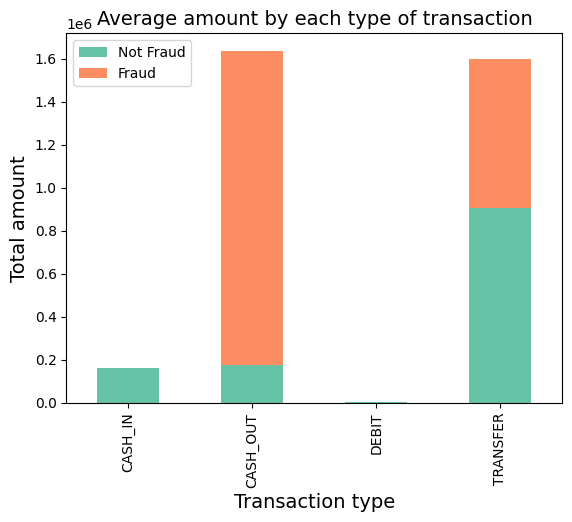

In [22]:
sum1 = data.groupby(['type', 'isFraud'])['amount'].mean().unstack(fill_value=0)
sum1.plot(kind = 'bar',  stacked=True, color=sns.color_palette("Set2"))
plt.title('Average amount by each type of transaction',fontsize = 14)
plt.xlabel('Transaction type',fontsize = 14)
plt.ylabel('Total amount',fontsize = 14)
plt.legend(['Not Fraud', 'Fraud'])
plt.show

## Correlation among all columns in the dataset

In [23]:
# Select only numeric columns for calculation
numeric_columns = data.select_dtypes(include=['number'])
relation = numeric_columns.corr()
relation

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.027829,-0.009226,-0.009163,0.037582,0.035139,0.028261,NaN
amount,0.027829,1.000000,-0.048149,-0.051623,0.262640,0.437577,0.051666,NaN
oldbalanceOrg,-0.009226,-0.048149,1.000000,0.999213,0.014833,-0.012700,0.001393,NaN
newbalanceOrig,-0.009163,-0.051623,0.999213,1.000000,0.016583,-0.012747,-0.011859,NaN
oldbalanceDest,0.037582,0.262640,0.014833,0.016583,1.000000,0.975011,-0.005404,NaN
newbalanceDest,0.035139,0.437577,-0.012700,-0.012747,0.975011,1.000000,0.004046,NaN
isFraud,0.028261,0.051666,0.001393,-0.011859,-0.005404,0.004046,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

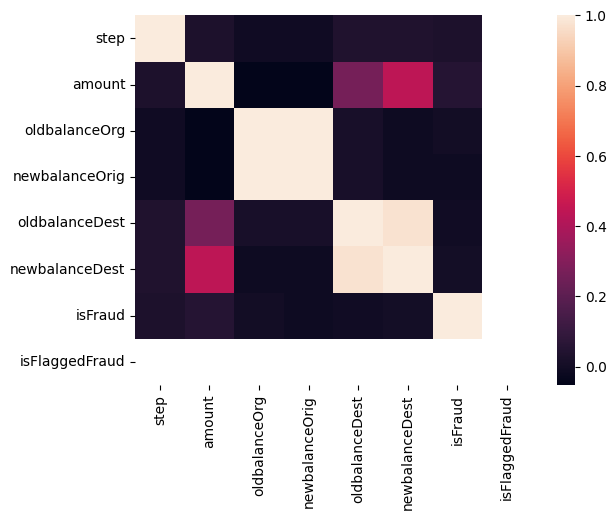

In [24]:
# Displaying the correlation values
sns.heatmap(relation)

- ## Multi-collinearity exists between the **oldbalanceOrg** and **newbalanceOrg** and also between **oldbalanceDest** and **newbalanceDest**

# Feature Engineering

- ### 'step' column indicates time in the real world. In this case 1 step is 1 hour of time.
- ### It has no relation with our machine model so we will remove the column

In [25]:
# Removing 'step' column
data.drop('step', axis=1, inplace = True)

C:\Users\oshev\AppData\Local\Temp\ipykernel_4260\4294110615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('step', axis=1, inplace = True)


- ### Since there is multi-collinearity between **oldbalanceOrg** and **newbalanceOrg**, selecting both of them as our feature will not be good because they are similar to each other therefore can affect accuracy.
- ### We will select **newbalanceOrg** because it is a feature that is obtain after a transaction which is important for our fraud detection model.
- ### The same principle of multi-collinearity is present between **oldbalanceDest** and **newbalanceDest**.
- ### We will select **newbalanceDest** because it is a feature that is obtain after a transaction which is important for our fraud detection model.

In [26]:
# Removing oldbalanceOrg and oldbalanceDest
data.drop(['oldbalanceDest','oldbalanceOrg'], axis=1, inplace = True)

C:\Users\oshev\AppData\Local\Temp\ipykernel_4260\3454608902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['oldbalanceDest','oldbalanceOrg'], axis=1, inplace = True)


In [27]:
data

,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
9,DEBIT,5337.77,C712410124,36382.23,C195600860,40348.79,0,0
10,DEBIT,9644.94,C1900366749,0.00,C997608398,157982.12,0,0
15,CASH_OUT,229133.94,C905080434,0.00,C476402209,51513.44,0,0
21,DEBIT,9302.79,C1566511282,1996.21,C1973538135,16896.70,0,0
24,TRANSFER,311685.89,C1984094095,0.00,C932583850,2719172.89,0,0
...,...,...,...,...,...,...,...,...
6362611,CASH_OUT,63416.99,C994950684,0.00,C1662241365,339850.17,1,0
6362613,CASH_OUT,1258818.82,C1436118706,0.00,C1240760502,1762283.33,1,0
6362615,CASH_OUT,339682.13,C786484425,0.00,C776919290,339682.13,1,0
6362617,CASH_OUT,6311409.28,C1162922333,0.00,C1365125890,6379898.11,1,0


- ## Since we are creating our own model for accurately predicting fraud detection, for that reason, we do not need the **isFlaggedFraud** column.

In [28]:
data.drop(['isFlaggedFraud'], axis=1, inplace = True)

C:\Users\oshev\AppData\Local\Temp\ipykernel_4260\2922695815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['isFlaggedFraud'], axis=1, inplace = True)


In [29]:
data

,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud
9,DEBIT,5337.77,C712410124,36382.23,C195600860,40348.79,0
10,DEBIT,9644.94,C1900366749,0.00,C997608398,157982.12,0
15,CASH_OUT,229133.94,C905080434,0.00,C476402209,51513.44,0
21,DEBIT,9302.79,C1566511282,1996.21,C1973538135,16896.70,0
24,TRANSFER,311685.89,C1984094095,0.00,C932583850,2719172.89,0
...,...,...,...,...,...,...,...
6362611,CASH_OUT,63416.99,C994950684,0.00,C1662241365,339850.17,1
6362613,CASH_OUT,1258818.82,C1436118706,0.00,C1240760502,1762283.33,1
6362615,CASH_OUT,339682.13,C786484425,0.00,C776919290,339682.13,1
6362617,CASH_OUT,6311409.28,C1162922333,0.00,C1365125890,6379898.11,1


In [30]:
data['nameOrig'].unique().size, data['nameDest'].unique().size 

(3919651, 519156)

- ## The **nameOrig** and **nameDest** columns contain *customer who started the transaction* and *customer who is the recipient of the transaction*. 
- ## There are **numerous** unique values and for that reson, will not be included in our feature

In [31]:
data.drop(['nameOrig','nameDest'], axis=1, inplace = True)

C:\Users\oshev\AppData\Local\Temp\ipykernel_4260\1862418388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['nameOrig','nameDest'], axis=1, inplace = True)


In [32]:
data

,type,amount,newbalanceOrig,newbalanceDest,isFraud
9,DEBIT,5337.77,36382.23,40348.79,0
10,DEBIT,9644.94,0.00,157982.12,0
15,CASH_OUT,229133.94,0.00,51513.44,0
21,DEBIT,9302.79,1996.21,16896.70,0
24,TRANSFER,311685.89,0.00,2719172.89,0
...,...,...,...,...,...
6362611,CASH_OUT,63416.99,0.00,339850.17,1
6362613,CASH_OUT,1258818.82,0.00,1762283.33,1
6362615,CASH_OUT,339682.13,0.00,339682.13,1
6362617,CASH_OUT,6311409.28,0.00,6379898.11,1


In [33]:
data['isFraud'].value_counts()

isFraud
0    3919064
1       4122
Name: count, dtype: int64

- ## The data is unbalanced
- ## N/B: An unbalanced dataset affects precision and accuracy score in evaluation metrics

##  Balancing the dataset

In [34]:
# Seperating the data in the 'isFraud' column ( 0 & 1)
notFraud = data[data['isFraud'] == 0]
print(notFraud.shape)
notFraud.head()

(3919064, 5)


,type,amount,newbalanceOrig,newbalanceDest,isFraud
9,DEBIT,5337.77,36382.23,40348.79,0
10,DEBIT,9644.94,0.00,157982.12,0
15,CASH_OUT,229133.94,0.00,51513.44,0
21,DEBIT,9302.79,1996.21,16896.70,0
24,TRANSFER,311685.89,0.00,2719172.89,0


In [35]:
fraud = data[data['isFraud'] == 1]
print(fraud.shape)
fraud.head()

(4122, 5)


,type,amount,newbalanceOrig,newbalanceDest,isFraud
681,CASH_OUT,20128.00,0.0,12145.85,1
724,CASH_OUT,416001.33,0.0,9291619.62,1
970,CASH_OUT,1277212.77,0.0,2444985.19,1
1116,CASH_OUT,35063.63,0.0,7550.03,1
1870,CASH_OUT,25071.46,0.0,34155.22,1


In [36]:
# To balance the data
notFraud = notFraud.sample(fraud.shape[0])

In [37]:
notFraud.shape, fraud.shape         # The dataset is not balanced

((4122, 5), (4122, 5))

In [38]:
# Joining the dataset; notFraud and fraud together into the final dataframe for prediction
final_data = pd.concat([notFraud, fraud], axis=0)

In [39]:
final_data.shape, final_data.sample(10)

((8244, 5),
              type      amount  newbalanceOrig  newbalanceDest  isFraud
 2752775  CASH_OUT  1947807.58             0.0      1947956.58        1
 442475   CASH_OUT   160082.46             0.0       273813.35        0
 6362351  CASH_OUT    71216.62             0.0        87309.96        1
 5563772  CASH_OUT   172362.84             0.0       715629.21        1
 5996416  CASH_OUT   204030.20             0.0       204030.20        1
 4494393  CASH_OUT   253838.18             0.0       253838.18        0
 5013113  CASH_OUT   231938.23             0.0       613554.95        0
 4011126  CASH_OUT  5166728.87             0.0      5166728.87        1
 3905471  CASH_OUT   800115.05             0.0      1117521.44        1
 4449860  CASH_OUT    87719.27             0.0        87719.27        0)

# Machine Learning Model Building

In [45]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
label_encoder = LabelEncoder()

for col in final_data.select_dtypes(include = ['object', 'category']).columns:
    final_data[col] = label_encoder.fit_transform(final_data[col])

In [42]:
final_data['type'].value_counts()

type
1    6486
0    1139
3     575
2      44
Name: count, dtype: int64

### NOTE: 1 = CASH_OUT, 0 = CASH_IN, 3 = TRANSFER, 4 = DEBIT

In [43]:
# Establishing our dependent and independent variables( i.e X and y)
X = final_data[['type','amount','newbalanceOrig','newbalanceDest']].values
y = final_data['isFraud'].values

## Splitting the data into **training data** and **validation data**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
#Applying feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
pipe = Pipeline([
    ('logic', LogisticRegression(solver = 'lbfgs'))
])

### I will establish some hyperparameters for the computer to pick the best parameters (Fine tuning)

In [87]:
hyperparameters = {
    'logic__penalty': ['l2'],
    'logic__C': [ 1, 10, 100],
}

In [88]:
classifier = GridSearchCV(pipe, hyperparameters, cv=5, scoring='accuracy')

In [89]:
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('logic', LogisticRegression())]),
             param_grid={'logic__C': [1, 10, 100], 'logic__penalty': ['l2']},
             scoring='accuracy')

In [91]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [93]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       712
           1       0.79      0.69      0.74       937

    accuracy                           0.72      1649
   macro avg       0.72      0.72      0.72      1649
weighted avg       0.73      0.72      0.72      1649



# Improving our Model

## Using Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([
    ('rfc', RandomForestClassifier(criterion= 'entropy'))
])

###  I will establish some hyperparameters for the computer to pick the best parameters (Fine tuning)

In [110]:
hyperparameters = {
    'rfc__n_estimators': [100, 200, 300, 500],
}

In [111]:
classifier3 = GridSearchCV(pipe, hyperparameters, cv=5, scoring='accuracy')

In [112]:
classifier3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rfc',
                                        RandomForestClassifier(criterion='entropy'))]),
             param_grid={'rfc__n_estimators': [100, 200, 300, 500]},
             scoring='accuracy')

In [113]:
y_pred = classifier3.predict(X_test)

In [114]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       850
           1       0.77      0.80      0.78       799

    accuracy                           0.79      1649
   macro avg       0.79      0.79      0.79      1649
weighted avg       0.79      0.79      0.79      1649



## Using XGBClassifier

In [134]:
from xgboost import XGBClassifier

In [135]:
pipe = Pipeline([
    ('class', XGBClassifier())  # Suppress warnings for eval_metric
])

In [136]:
# Define the hyper parameter grid
hyperparameters = {
    'class__max_depth': [3, 6, 10],                           # Maximum depth of a tree
    'class__learning_rate': [0.01, 0.05, 0.1],                # Step size shrinkage 
    'class__n_estimators': [100, 500, 1000],                  # Number of boosting rounds
}

In [137]:
classifier4 = GridSearchCV(pipe, hyperparameters, cv=5, scoring='accuracy')

In [138]:
classifier4.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('class',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'class__learning_rate': [0.01, 0.05, 0.1],
                         'class__max_depth': [3, 6, 10],
                         'class__n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [139]:
y_pred = classifier3.predict(X_test)

In [140]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       850
           1       0.77      0.80      0.78       799

    accuracy                           0.79      1649
   macro avg       0.79      0.79      0.79      1649
weighted avg       0.79      0.79      0.79      1649

